<a href="https://colab.research.google.com/github/Hrygt/SmartThingsPublic/blob/master/Digit_Recognizer_Module_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [ ]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

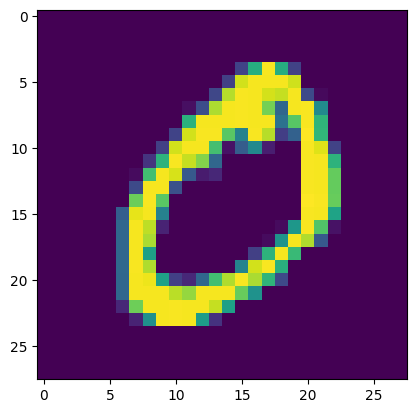

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2805 - accuracy: 0.9193 - val_loss: 0.1448 - val_accuracy: 0.9592
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1181 - accuracy: 0.9639 - val_loss: 0.1317 - val_accuracy: 0.9597
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0822 - accuracy: 0.9753 - val_loss: 0.0991 - val_accuracy: 0.9725
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0608 - accuracy: 0.9813 - val_loss: 0.1123 - val_accuracy: 0.9692
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0485 - accuracy: 0.9850 - val_loss: 0.0967 - val_accuracy: 0.9728
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0386 - accuracy: 0.9874 - val_loss: 0.1106 - val_accuracy: 0.9694
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0306 - accuracy: 0.9899 - val_loss: 0.1074 - val_accuracy:

In [ ]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [ ]:
y_prob

array([[3.23928904e-15, 1.87334825e-15, 1.52232505e-14, ...,
        9.99999940e-01, 1.25999658e-16, 5.55380221e-12],
       [3.23437895e-20, 1.44351219e-14, 9.99999940e-01, ...,
        1.00471760e-24, 1.52570180e-23, 0.00000000e+00],
       [3.31102347e-16, 9.99999940e-01, 4.30211118e-12, ...,
        5.77936643e-10, 4.74299533e-08, 2.22432414e-16],
       ...,
       [2.22854488e-24, 2.09488438e-22, 1.02185966e-25, ...,
        4.54757398e-17, 1.15587625e-16, 2.10487484e-13],
       [1.51711781e-31, 5.11398178e-20, 1.61881264e-38, ...,
        1.23995820e-20, 1.26084412e-14, 6.22787319e-26],
       [9.05241233e-19, 7.88887239e-21, 1.61528831e-18, ...,
        1.08147854e-26, 7.94692965e-20, 1.01853875e-20]], dtype=float32)

In [ ]:
y_pred = y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9787

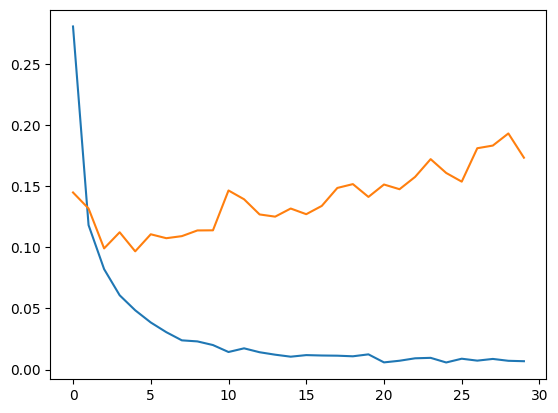

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

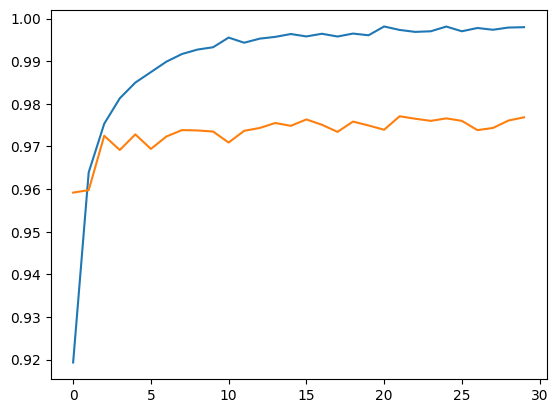

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

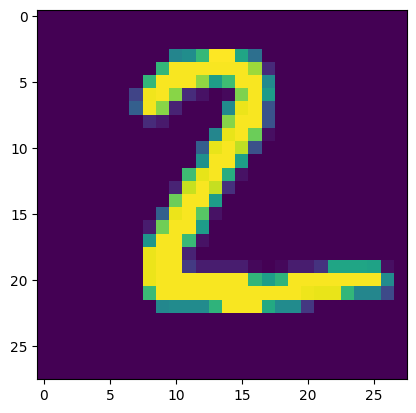

In [ ]:
plt.imshow(X_test[1])

In [ ]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 23ms/step


array([2])